In [20]:
%matplotlib inline
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('./selfblast.out',sep='\t',comment='#',header=None) #커널에서 작업한 blast 파일을 불러오기

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,AT1G01010.1,AT1G01010.1,100.000,429,0,0,1,429,1,429,0.000000e+00,895.0
1,AT1G01010.1,AT4G01550.1,32.623,469,248,15,1,428,2,443,1.400000e-56,192.0
2,AT1G01010.1,AT1G02230.1,33.929,336,158,10,1,330,1,278,6.550000e-42,151.0
3,AT1G01010.1,AT1G02250.1,32.092,349,158,14,1,331,1,288,1.540000e-39,145.0
4,AT1G01010.1,AT4G01520.1,39.326,178,95,5,1,175,2,169,3.050000e-33,126.0


In [4]:
c ='query acc.ver, subject acc.ver, % identity, alignment length, mismatches, gap opens, q. start, q. end, s. start, s. end, evalue, bit score'
#selfblast.out 파일의 필드 값을 복사-붙여넣기해서 컬럼을 만듦

In [5]:
c = [x.strip() for x in c.split(',')] #쉼표 기준으로 분리, 공백 제거

In [6]:
df.columns = c #컬럼 적용하기

In [7]:
df.head() #query(대상) - subject 간 매치 결과를 확인할 수 있음

,query acc.ver,subject acc.ver,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score
0,AT1G01010.1,AT1G01010.1,100.000,429,0,0,1,429,1,429,0.000000e+00,895.0
1,AT1G01010.1,AT4G01550.1,32.623,469,248,15,1,428,2,443,1.400000e-56,192.0
2,AT1G01010.1,AT1G02230.1,33.929,336,158,10,1,330,1,278,6.550000e-42,151.0
3,AT1G01010.1,AT1G02250.1,32.092,349,158,14,1,331,1,288,1.540000e-39,145.0
4,AT1G01010.1,AT4G01520.1,39.326,178,95,5,1,175,2,169,3.050000e-33,126.0


In [11]:
#m = df.apply(lambda x : x['query acc.ver'] == x['subject acc.ver'],axis=1)

m = df['query acc.ver'] == df['subject acc.ver']

#query - subject 중복되는 값 마스킹할 수 있게 만듦. 둘 다 같은 기능. 아래 방법이 간단함

In [12]:
df[~m].head() #query - subject가 같은 경우를 제거

,query acc.ver,subject acc.ver,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score
1,AT1G01010.1,AT4G01550.1,32.623,469,248,15,1,428,2,443,1.400000e-56,192.0
2,AT1G01010.1,AT1G02230.1,33.929,336,158,10,1,330,1,278,6.550000e-42,151.0
3,AT1G01010.1,AT1G02250.1,32.092,349,158,14,1,331,1,288,1.540000e-39,145.0
4,AT1G01010.1,AT4G01520.1,39.326,178,95,5,1,175,2,169,3.050000e-33,126.0
5,AT1G01010.1,AT4G01540.1,39.888,178,94,6,1,175,2,169,1.090000e-31,125.0


In [13]:
#evalue: 두 서열이 비슷한건 우연이다 > 귀무가설로 채택. 이를 기준으로 평가. 0에 가까운 값을 target으로

In [14]:
df_genefamily = df[~m]

In [15]:
df_genefamily_ix = df_genefamily.set_index('query acc.ver')

In [16]:
df_genefamily_ix.loc['AT1G01050.1'] #해당 query의 결과를 보여줌

,subject acc.ver,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score
query acc.ver,,,,,,,,,,,
AT1G01050.1,AT2G46860.1,89.048,210,23,0,3,212,7,216,3.470000e-142,395.0
AT1G01050.1,AT4G01480.1,89.720,214,19,1,2,212,3,216,9.520000e-142,394.0
AT1G01050.1,AT3G53620.1,84.772,197,30,0,16,212,20,216,9.460000e-128,358.0
AT1G01050.1,AT2G18230.1,74.752,202,51,0,11,212,17,218,2.290000e-115,327.0
AT1G01050.1,AT5G09650.1,34.031,191,98,8,12,178,70,256,4.180000e-19,83.2


In [29]:
subjects = [x.split('.')[0] for x in df_genefamily_ix.loc['AT1G01050.1']['subject acc.ver'].values]
subjects.append('AT1G01010')

df_tpms = pd.read_csv('./tpms.tsv',sep='\t',comment='#')

df_tpms_ix = df_tpms.set_index('Gene ID')

df_PPA = df_tpms_ix.loc[subjects].fillna(0) #NaN값 처리

In [34]:
sub_df = df_PPA.reset_index().set_index('Gene Name')[['leaf','flower','fruit','root']]

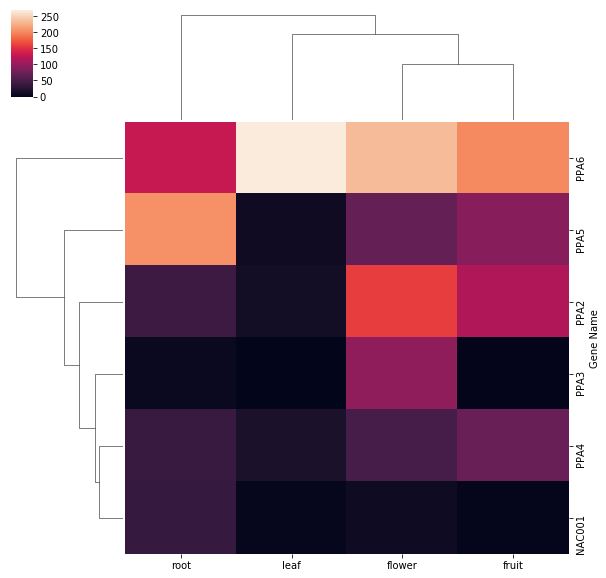

In [35]:
sns.clustermap(sub_df)
#seaborn clustermap. PPA 종류에 따라 어떤 부위에서 발현되는지를 확인할 수 있음
#왼쪽 계통을 통해 유전자 간 연관성을 알아볼 수 있다 > function analysis에 활용 가능